## Model for Drone Steering

The tensorflowjs library can't be installed directly with pip / conda due to conflicting dependencies. Best is to set up a new environment explicitly for this and install tensorflowjs with the following commands:

```
pip install tensorflow==1.11.0rc2 h5py numpy keras
pip install --no-deps tensorflowjs
```

In [3]:
! pip install tensorflow==1.11.0rc2 h5py numpy keras
! pip install --no-deps tensorflowjs

  Could not find a version that satisfies the requirement tensorflow==1.11.0rc2 (from versions: 0.12.1, 1.0.0, 1.1.0rc0, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.2.0rc0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.3.0rc0, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.4.0rc0, 1.4.0rc1, 1.4.0, 1.4.1, 1.5.0rc0, 1.5.0rc1, 1.5.0, 1.5.1, 1.6.0rc0, 1.6.0rc1, 1.6.0, 1.7.0rc0, 1.7.0rc1, 1.7.0, 1.7.1, 1.8.0rc0, 1.8.0rc1, 1.8.0, 1.9.0rc0, 1.9.0rc1, 1.9.0rc2, 1.9.0, 1.10.0rc0, 1.10.0rc1, 1.10.0, 1.10.1, 1.11.0rc0, 1.11.0, 1.12.0rc0, 1.12.0rc1)
No matching distribution found for tensorflow==1.11.0rc2
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Inspect Train Data

In [5]:
! ls

drone_steering_model.ipynb


In [6]:
!pwd

/Users/lsafari/drone_steering/models


In [7]:
!pwd

/Users/lsafari/drone_steering/models


In [8]:
#df = pd.read_csv("video_001.csv", delimiter=',')
# Christian's video is less noisy. Therefore I only train the model with his data at the moment. 
# acc increased 5 % taking his video camparing to all videos.
df = pd.read_csv("/Users/lsafari/drone_steering/data/video_Christian_posture_steptime50_checksum8160.csv",low_memory=False)
#df=df.drop([5557], axis=0)
#type(df.leftShoulder_x)
#df.info()
df.head(3)


,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,label
0,0.0075,0.0825,0.14,0.02625,0.68875,0.56125,0.12125,0.59,0.04625,0.065,-0.00125,0.04625,0.65125,0.57,0.5625,0.56875,NaN
1,0.0075,0.0825,0.14,0.02625,0.68875,0.56125,0.12125,0.59,0.04625,0.065,-0.00125,0.04625,0.65125,0.57,0.5625,0.56875,NaN
2,0.0075,0.0825,0.14,0.02625,0.68875,0.56125,0.12125,0.59,0.04625,0.065,-0.00125,0.04625,0.65125,0.57,0.5625,0.56875,NaN


In [9]:
#df.describe()

In [10]:
df.label.unique()

array([nan,  1.,  3.,  4.,  2.,  0.])

In [11]:
df.shape

(1056, 17)

In [12]:
for i in df:
    print(i, df[i].isnull().sum())    

leftShoulder_x 0
leftShoulder_y 0
rightShoulder_x 0
rightShoulder_y 0
leftElbow_x 0
leftElbow_y 0
rightElbow_x 0
rightElbow_y 0
leftWrist_x 0
leftWrist_y 0
rightWrist_x 0
rightWrist_y 0
leftHip_x 0
leftHip_y 0
rightHip_x 0
rightHip_y 0
label 67


In [13]:
df1=df.dropna().drop_duplicates()
#df1
#df1
df1.shape

(441, 17)

In [14]:
df1.describe()

,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,label
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.487404,0.209447,0.389915,0.208537,0.520635,0.248858,0.345726,0.234147,0.520354,0.285516,0.360306,0.250459,0.469175,0.377911,0.402154,0.378206,2.478458
std,0.029151,0.033319,0.013844,0.033121,0.029845,0.076316,0.029370,0.070518,0.055750,0.138472,0.091182,0.129815,0.019395,0.056548,0.009211,0.055668,1.356839
min,0.007500,0.082500,0.140000,0.026250,0.467500,0.107500,0.121250,0.100000,0.046250,0.015000,-0.001250,0.022500,0.436250,0.315000,0.385000,0.316250,0.000000
25%,0.473750,0.186250,0.386250,0.185000,0.492500,0.193750,0.323750,0.187500,0.488750,0.201250,0.332500,0.132500,0.455000,0.332500,0.397500,0.333750,1.000000
50%,0.478750,0.190000,0.387500,0.191250,0.523750,0.260000,0.357500,0.257500,0.505000,0.330000,0.366250,0.320000,0.460000,0.337500,0.401250,0.337500,3.000000
75%,0.506250,0.253750,0.393750,0.250000,0.538750,0.268750,0.367500,0.270000,0.540000,0.337500,0.385000,0.337500,0.488750,0.443750,0.406250,0.443750,4.000000
max,0.516250,0.267500,0.412500,0.265000,0.688750,0.561250,0.516250,0.590000,0.687500,0.465000,0.680000,0.458750,0.651250,0.570000,0.562500,0.568750,4.000000


# Visualize the Data

In [ ]:
#df.plot('leftShoulder_y', 'label', kind='scatter')
#df1.plot('leftShoulder_x', 'label', kind='scatter')
#df1.plot('rightShoulder_x', 'label', kind='scatter')

In [15]:
import numpy as np

In [16]:
df_shuffled = df1.loc[np.random.permutation(df1.index)]
df_train = df_shuffled.iloc[:int(df_shuffled.shape[0]*0.8)]
df_val = df_shuffled.iloc[int(df_shuffled.shape[0]*0.8):]

In [17]:
df_train.shape[0] + df_val.shape[0] == df_shuffled.shape[0]

True

In [19]:
y_train = df_train['label']
x_train = df_train.drop('label', axis = 1)

y_val = df_val['label']
x_val = df_val.drop('label', axis = 1)

In [20]:
#df_shuffled.columns
#y_train
#x_train

In [21]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((352, 16), (352,), (89, 16), (89,))

In [22]:
x_train=x_train.values
y_train=y_train.values
x_val=x_val.values
y_val=y_val.values

In [23]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((352, 16), (352,), (89, 16), (89,))

In [28]:
#x_train
y_train[0]

4.0

### Training Model

In [29]:
#Load data from a text file, with missing values handled as specified
#data_csv = np.genfromtxt('/Users/lsafari/drone_steering/data/video_all_posture_steptime50_checksum8160.csv', delimiter=',')
#train_x = data_csv[1:2000,0:16] 
#train_y = data_csv[1:2000,16:17]
#test_x = data_csv[2000:,0:16] 
#test_y = data_csv[2000:,16:17]

In [30]:
print(x_train[48])

[0.47625 0.185   0.38625 0.18625 0.49125 0.26625 0.32    0.23    0.48875
 0.33125 0.38875 0.31875 0.4575  0.33    0.39875 0.3325 ]


In [31]:
print(y_train[20])

1.0


In [32]:
y_train[4]

4.0

In [33]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

/Users/lsafari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
y_train.shape

(352, 5)

In [35]:
print(x_train[0])
print(y_train[0])

[0.51    0.2575  0.39    0.2575  0.59    0.2875  0.36875 0.33    0.61875
 0.30375 0.3875  0.385   0.48375 0.45    0.4075  0.44625]
[0. 0. 0. 0. 1.]


In [40]:
from keras import models, layers
from keras.models import Model
from keras.layers import Input, Dense

model = models.Sequential()
model.add(layers.Dense(
    5, 
    activation="relu", 
    input_shape=(16, )))
model.add(layers.Dense(5, activation="softmax")) #is a fast rectifier

#inp = Input(shape=(16,))
#dense = Dense(5)(inp)
#model = Model(inputs=inp, outputs=dense)

#model=Model(Dense(5, activation="softmax")) #probability distribution over 5 different possible outcomes

model.summary()   

#compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None,\
      #  weighted_metrics=None, target_tensors=None)


from keras import optimizers, losses, metrics
model.compile(
    optimizer=optimizers.RMSprop(lr=0.01),
    loss=losses.categorical_crossentropy,
   # metrics=[metrics.categorical_accuracy]
     metrics=["accuracy"] 
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 85        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=50
)

Epoch 1/500
352/352 [==============================] - 0s 321us/step - loss: 1.5513 - acc: 0.2386
Epoch 2/500
352/352 [==============================] - 0s 28us/step - loss: 1.4553 - acc: 0.2955
Epoch 3/500
352/352 [==============================] - 0s 29us/step - loss: 1.4139 - acc: 0.4261
Epoch 4/500
352/352 [==============================] - 0s 30us/step - loss: 1.4021 - acc: 0.3949
Epoch 5/500
352/352 [==============================] - 0s 31us/step - loss: 1.3939 - acc: 0.4091
Epoch 6/500
352/352 [==============================] - 0s 28us/step - loss: 1.3852 - acc: 0.4347
Epoch 7/500
352/352 [==============================] - 0s 30us/step - loss: 1.3814 - acc: 0.5199
Epoch 8/500
352/352 [==============================] - 0s 29us/step - loss: 1.3591 - acc: 0.5227
Epoch 9/500
352/352 [==============================] - 0s 32us/step - loss: 1.3547 - acc: 0.5682
Epoch 10/500
352/352 [==============================] - 0s 31us/step - loss: 1.3399 - acc: 0.5483
Epoch 11/500
352/352 [======

352/352 [==============================] - 0s 32us/step - loss: 0.9858 - acc: 0.5966
Epoch 85/500
352/352 [==============================] - 0s 28us/step - loss: 0.9677 - acc: 0.6165
Epoch 86/500
352/352 [==============================] - 0s 28us/step - loss: 0.9647 - acc: 0.6278
Epoch 87/500
352/352 [==============================] - 0s 29us/step - loss: 0.9635 - acc: 0.6307
Epoch 88/500
352/352 [==============================] - 0s 30us/step - loss: 0.9591 - acc: 0.6364
Epoch 89/500
352/352 [==============================] - 0s 31us/step - loss: 0.9601 - acc: 0.6307
Epoch 90/500
352/352 [==============================] - 0s 31us/step - loss: 0.9545 - acc: 0.6222
Epoch 91/500
352/352 [==============================] - 0s 28us/step - loss: 0.9683 - acc: 0.6193
Epoch 92/500
352/352 [==============================] - 0s 29us/step - loss: 0.9878 - acc: 0.5881
Epoch 93/500
352/352 [==============================] - 0s 30us/step - loss: 0.9510 - acc: 0.6250
Epoch 94/500
352/352 [===========

352/352 [==============================] - 0s 29us/step - loss: 0.8195 - acc: 0.6420
Epoch 168/500
352/352 [==============================] - 0s 34us/step - loss: 0.8362 - acc: 0.6449
Epoch 169/500
352/352 [==============================] - 0s 30us/step - loss: 0.8231 - acc: 0.6420
Epoch 170/500
352/352 [==============================] - 0s 28us/step - loss: 0.8210 - acc: 0.6307
Epoch 171/500
352/352 [==============================] - 0s 29us/step - loss: 0.8487 - acc: 0.6080
Epoch 172/500
352/352 [==============================] - 0s 32us/step - loss: 0.8344 - acc: 0.6392
Epoch 173/500
352/352 [==============================] - 0s 32us/step - loss: 0.8266 - acc: 0.6222
Epoch 174/500
352/352 [==============================] - 0s 30us/step - loss: 0.8126 - acc: 0.6364
Epoch 175/500
352/352 [==============================] - 0s 28us/step - loss: 0.8462 - acc: 0.6222
Epoch 176/500
352/352 [==============================] - 0s 34us/step - loss: 0.8196 - acc: 0.6335
Epoch 177/500
352/352 [=

352/352 [==============================] - 0s 29us/step - loss: 0.7835 - acc: 0.6477
Epoch 250/500
352/352 [==============================] - 0s 29us/step - loss: 0.7541 - acc: 0.6534
Epoch 251/500
352/352 [==============================] - 0s 26us/step - loss: 0.7595 - acc: 0.6790
Epoch 252/500
352/352 [==============================] - 0s 32us/step - loss: 0.8213 - acc: 0.6449
Epoch 253/500
352/352 [==============================] - 0s 27us/step - loss: 0.7591 - acc: 0.6562
Epoch 254/500
352/352 [==============================] - 0s 30us/step - loss: 0.7436 - acc: 0.6676
Epoch 255/500
352/352 [==============================] - 0s 29us/step - loss: 0.8493 - acc: 0.6335
Epoch 256/500
352/352 [==============================] - 0s 31us/step - loss: 0.7851 - acc: 0.6477
Epoch 257/500
352/352 [==============================] - 0s 31us/step - loss: 0.7470 - acc: 0.6534
Epoch 258/500
352/352 [==============================] - 0s 32us/step - loss: 0.7390 - acc: 0.6903
Epoch 259/500
352/352 [=

352/352 [==============================] - 0s 31us/step - loss: 0.7108 - acc: 0.6648
Epoch 332/500
352/352 [==============================] - 0s 33us/step - loss: 0.7145 - acc: 0.6875
Epoch 333/500
352/352 [==============================] - 0s 32us/step - loss: 0.7112 - acc: 0.6932
Epoch 334/500
352/352 [==============================] - 0s 30us/step - loss: 0.7533 - acc: 0.6591
Epoch 335/500
352/352 [==============================] - 0s 38us/step - loss: 0.7277 - acc: 0.6705
Epoch 336/500
352/352 [==============================] - 0s 33us/step - loss: 0.7246 - acc: 0.6761
Epoch 337/500
352/352 [==============================] - 0s 29us/step - loss: 0.7172 - acc: 0.6761
Epoch 338/500
352/352 [==============================] - 0s 30us/step - loss: 0.7089 - acc: 0.6989
Epoch 339/500
352/352 [==============================] - 0s 29us/step - loss: 0.7325 - acc: 0.6790
Epoch 340/500
352/352 [==============================] - 0s 33us/step - loss: 0.7339 - acc: 0.6676
Epoch 341/500
352/352 [=

352/352 [==============================] - 0s 28us/step - loss: 0.7029 - acc: 0.6733
Epoch 414/500
352/352 [==============================] - 0s 32us/step - loss: 0.7208 - acc: 0.6847
Epoch 415/500
352/352 [==============================] - 0s 32us/step - loss: 0.6836 - acc: 0.7131
Epoch 416/500
352/352 [==============================] - 0s 30us/step - loss: 0.7119 - acc: 0.6989
Epoch 417/500
352/352 [==============================] - 0s 32us/step - loss: 0.6696 - acc: 0.6932
Epoch 418/500
352/352 [==============================] - 0s 31us/step - loss: 0.7446 - acc: 0.6648
Epoch 419/500
352/352 [==============================] - 0s 32us/step - loss: 0.6728 - acc: 0.7017
Epoch 420/500
352/352 [==============================] - 0s 28us/step - loss: 0.6814 - acc: 0.6875
Epoch 421/500
352/352 [==============================] - 0s 32us/step - loss: 0.7026 - acc: 0.6790
Epoch 422/500
352/352 [==============================] - 0s 31us/step - loss: 0.6878 - acc: 0.7131
Epoch 423/500
352/352 [=

352/352 [==============================] - 0s 29us/step - loss: 0.6621 - acc: 0.6989
Epoch 496/500
352/352 [==============================] - 0s 31us/step - loss: 0.6904 - acc: 0.6989
Epoch 497/500
352/352 [==============================] - 0s 31us/step - loss: 0.6902 - acc: 0.7045
Epoch 498/500
352/352 [==============================] - 0s 30us/step - loss: 0.6698 - acc: 0.7102
Epoch 499/500
352/352 [==============================] - 0s 33us/step - loss: 0.6679 - acc: 0.7102
Epoch 500/500
352/352 [==============================] - 0s 31us/step - loss: 0.6747 - acc: 0.7074


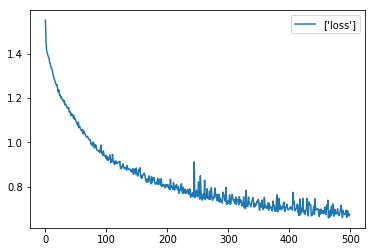

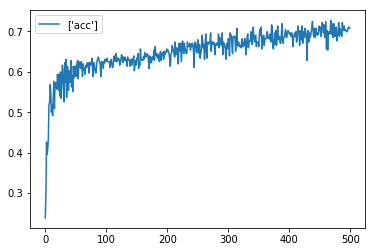

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label=["loss"]) #play with hyperparameters to see the changes
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"],  label=["acc"])
plt.legend()
plt.show()
plt.close()



In [44]:
test_loss, test_acc = model.evaluate(x_val, y_val)
print("Loss / Accuracy Evaluation")
print("--------------------------")
print("Loss:     " + str(round(test_loss,5)))
print("Accuracy: " + str(round(test_acc,2)))

89/89 [==============================] - 0s 249us/step
Loss / Accuracy Evaluation
--------------------------
Loss:     0.91863
Accuracy: 0.67


In [45]:
val_y_pred = model.predict(x_val)

In [46]:
val_y_pred[10]

array([6.4028287e-04, 7.4536871e-04, 8.1612331e-01, 2.4421853e-03,
       1.8004882e-01], dtype=float32)

In [47]:
y_val[10]

array([0., 0., 1., 0., 0.], dtype=float32)

### Save Model in tensorflow.js Format

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, 'model_tfjs')

We need to adapt the two files as follows in order for them to work on Azure:
* add a file extension .pb to the file with no extension (otherwise Azure blocks it from viewing)
* adapt the automatically generated model.json to reflect the extension .pb